<a href="https://colab.research.google.com/github/fyprjgroup3/FY_project/blob/avik's_work/Labelizer_nbv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import json
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
import collections
#nltk.download('stopwords')

from google.colab import drive
from google.colab import files
#import io
#uploaded = files.upload()

#drive.mount('/content/drive') # mounting drive in each runtime

pd.set_option("display.max_columns",2500)
pd.set_option("display.max_rows",2500)

In [167]:
#importing the dataset
dset=pd.read_csv('/content/drive/My Drive/FY_project/dataset/results-20190513-ofapr19.csv')
dset.head()

,action,url,title,body,labels
0,"""closed""","""https://github.com/Microsoft/vcpkg/issues/4548""","""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""closed""","""https://github.com/primefaces/primeng/issues/...","""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
2,"""closed""","""https://github.com/zen-kernel/zen-kernel/issu...","""bfq error""","""Hi, Steven/\r\nAfter last update today >git f...",[]
3,"""closed""","""https://github.com/biig-io/ngx-smart-modal/is...","""Can't open next modal at once after closing p...","""\r\nwhen I click immediately after closing pr...",[]
4,"""closed""","""https://github.com/istio/istio/issues/12790""","""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."


In [168]:
#No of rows initially
print("No. of Rows:",end=" ")
dset.shape[0]

No. of Rows: 

7964

In [169]:
# Removing Duplicates if any in the dataset
print('The no. of duplicates in the data are',dset.duplicated().sum())

The no. of duplicates in the data are 3


In [0]:
dset.drop_duplicates(inplace=True)

In [171]:
dset.shape

(7961, 5)

In [172]:
# selecting necessary features
prc_dset=dset[["title","body","labels"]]
prc_dset.head()

,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
2,"""bfq error""","""Hi, Steven/\r\nAfter last update today >git f...",[]
3,"""Can't open next modal at once after closing p...","""\r\nwhen I click immediately after closing pr...",[]
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."


In [173]:
# Removing empty label rows
def clean(s):
  '''
  Sets Empty labels as NaNs
  '''
  
  if s == "[]":
    s=np.nan
  return s
    
prc_dset['labels']=prc_dset['labels'].apply(lambda x: clean(x))
prc_dset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
2,"""bfq error""","""Hi, Steven/\r\nAfter last update today >git f...",NaN
3,"""Can't open next modal at once after closing p...","""\r\nwhen I click immediately after closing pr...",NaN
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."


In [174]:
prc_dset.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
prc_dset.head()

,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...","[{""id"":455857191,""node_id"":""MDU6TGFiZWw0NTU4NT..."
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...","[{""id"":312160661,""node_id"":""MDU6TGFiZWwzMTIxNj..."
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...","[{""id"":670442116,""node_id"":""MDU6TGFiZWw2NzA0ND..."
5,"""[0.5][Tradingview] Quick Chart resize does no...","""**Describe the bug**\r\nThe up and down arrow...","[{""id"":1089646255,""node_id"":""MDU6TGFiZWwxMDg5N..."
6,"""Upgrade isort""","""We are using 4.3.4 but [isort[(https://pypi.o...","[{""id"":717069763,""node_id"":""MDU6TGFiZWw3MTcwNj..."


In [176]:
print("No. rows after null label rows removed:",end=" ")
prc_dset.shape[0]

No. rows after null label rows removed: 

4063

In [177]:
# checking the format of labels
prc_dset['labels'][5]

'[{"id":1089646255,"node_id":"MDU6TGFiZWwxMDg5NjQ2MjU1","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[1b]%20User%20Story","name":"[1b] User Story","color":"b8e4fc","default":false},{"id":272058720,"node_id":"MDU6TGFiZWwyNzIwNTg3MjA=","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[3]%20Bug","name":"[3] Bug","color":"b60205","default":false},{"id":522016380,"node_id":"MDU6TGFiZWw1MjIwMTYzODA=","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[4c]%20High%20Priority","name":"[4c] High Priority","color":"fbca04","default":false},{"id":1089668332,"node_id":"MDU6TGFiZWwxMDg5NjY4MzMy","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[5a]%20Tiny","name":"[5a] Tiny","color":"f9aed0","default":false},{"id":1133046734,"node_id":"MDU6TGFiZWwxMTMzMDQ2NzM0","url":"https://api.github.com/repos/bitshares/bitshares-ui/labels/[6]%20RC%20Blockage","name":"[6] RC Blockage","color":"0052cc","default":false},{"id":1134524965,"node_id"

In [178]:
#since labels are of string type converting it into list of dictionaries
json.loads(prc_dset['labels'][5])

[{'color': 'b8e4fc',
  'default': False,
  'id': 1089646255,
  'name': '[1b] User Story',
  'node_id': 'MDU6TGFiZWwxMDg5NjQ2MjU1',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[1b]%20User%20Story'},
 {'color': 'b60205',
  'default': False,
  'id': 272058720,
  'name': '[3] Bug',
  'node_id': 'MDU6TGFiZWwyNzIwNTg3MjA=',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[3]%20Bug'},
 {'color': 'fbca04',
  'default': False,
  'id': 522016380,
  'name': '[4c] High Priority',
  'node_id': 'MDU6TGFiZWw1MjIwMTYzODA=',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[4c]%20High%20Priority'},
 {'color': 'f9aed0',
  'default': False,
  'id': 1089668332,
  'name': '[5a] Tiny',
  'node_id': 'MDU6TGFiZWwxMDg5NjY4MzMy',
  'url': 'https://api.github.com/repos/bitshares/bitshares-ui/labels/[5a]%20Tiny'},
 {'color': '0052cc',
  'default': False,
  'id': 1133046734,
  'name': '[6] RC Blockage',
  'node_id': 'MDU6TGFiZWwxMTMzMDQ2NzM0',
  'ur

In [179]:
#To extract only name field from labels
[x['name'] for x in json.loads(prc_dset['labels'][5])]

['[1b] User Story',
 '[3] Bug',
 '[4c] High Priority',
 '[5a] Tiny',
 '[6] RC Blockage',
 '[7] Estimated']

In [180]:
#Converting names of labels into list of lists
labels=[]

for i in prc_dset['labels']:
  labels.append([x['name'] for x in json.loads(i)])

labels[:10]

[['needs-repro'],
 ['enhancement'],
 ['area/environments'],
 ['[1b] User Story',
  '[3] Bug',
  '[4c] High Priority',
  '[5a] Tiny',
  '[6] RC Blockage',
  '[7] Estimated'],
 ['feature-refactoring', 'good first issue', 'needs PR', 'type-code health'],
 ['feature'],
 ['Feature:Search', 'Feature:Telemetry', 'P1', 'a-c'],
 ['A-partitioning', 'A-sql-syntax', 'C-enhancement'],
 ['enhancement', 'priority:low'],
 ['ApiTestUat']]

In [181]:
#merging processed labels into the dataset
prc_dset['labels']=labels
prc_dset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,body,labels
0,"""Error: Building package zlib:x64-windows-stat...","""\r\nPackage: zlib:x64-windows-static\r\nVcpkg...",[needs-repro]
1,"""Pagination bug when removing an item""","""Reported by a PRO user;\r\n\r\n> If for exemp...",[enhancement]
4,"""Helm podAntiAffinity templating error""","""**Describe the bug**\r\n\r\nHelm charts fail ...",[area/environments]
5,"""[0.5][Tradingview] Quick Chart resize does no...","""**Describe the bug**\r\nThe up and down arrow...","[[1b] User Story, [3] Bug, [4c] High Priority,..."
6,"""Upgrade isort""","""We are using 4.3.4 but [isort[(https://pypi.o...","[feature-refactoring, good first issue, needs ..."


In [0]:
stopwords = nltk.corpus.stopwords.words('english')

In [183]:
print(len(stopwords))

179


In [184]:
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [185]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
# function for text cleaning 
def clean_text(s):
    s=re.sub("[\'\"]","",s) #remove '' and ""
    s=re.sub("\\\\r","",s)  #remove \r
    s=re.sub("\\\\n","",s)  #remove \n
    s=re.sub("[^a-zA-Z]"," ",s) #remove everything but letters
    s=''.join([char for char in s if char not in string.punctuation]) #remove all punctuations
    #l=[word.lower() for word in s.split() if not word.lower() in stopword]  #remove stopwords
    s = ' '.join(s.split()) # remove whitespaces 
    s = s.lower()# convert text to lowercase 

    return s


In [187]:
# cleaning of title and body fields
prc_dset['title'] = prc_dset['title'].apply(lambda x: clean_text(x))
prc_dset['body'] = prc_dset['body'].apply(lambda x: clean_text(x))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [188]:
#Cleaned labels and body fields
prc_dset.head(10)

,title,body,labels
0,error building package zlib x windows static f...,package zlib x windows staticvcpkg version debug,[needs-repro]
1,pagination bug when removing an item,reported by a pro user if for exemple we have ...,[enhancement]
4,helm podantiaffinity templating error,describe the bug helm charts fail to generate ...,[area/environments]
5,tradingview quick chart resize does not honor ...,describe the bug the up and down arrows for tr...,"[[1b] User Story, [3] Bug, [4c] High Priority,..."
6,upgrade isort,we are using but isort https pypi org project ...,"[feature-refactoring, good first issue, needs ..."
7,configurable window of completion,from not fixed the window for completion of a ...,[feature]
8,telemetry add search counts to baseline ping,follow up on https github com mozilla mobile f...,"[Feature:Search, Feature:Telemetry, P1, a-c]"
9,sql show zone configuration for table table na...,describe the problem i partitioned a table cre...,"[A-partitioning, A-sql-syntax, C-enhancement]"
12,add ice and snow melt flag general flag category,could be useful in some cases,"[enhancement, priority:low]"
13,vulnerability ddos get api v projects,project apitestuattemplate apiv projectsgetque...,[ApiTestUat]


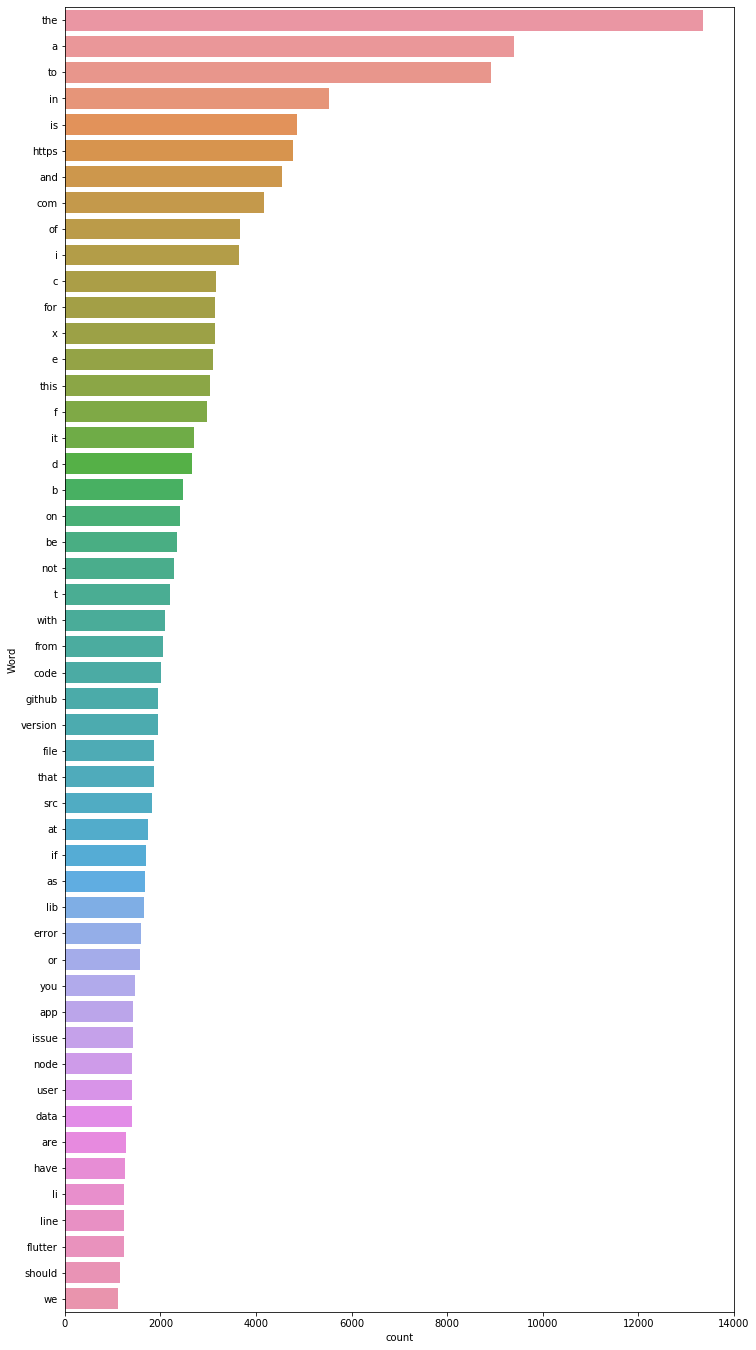

In [189]:
#find out the most frequent words in the title and body
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top n most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,24)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 50 most frequent words 
freq_words(prc_dset['body'], 50)
# Denotes many stopwords are present in title and body

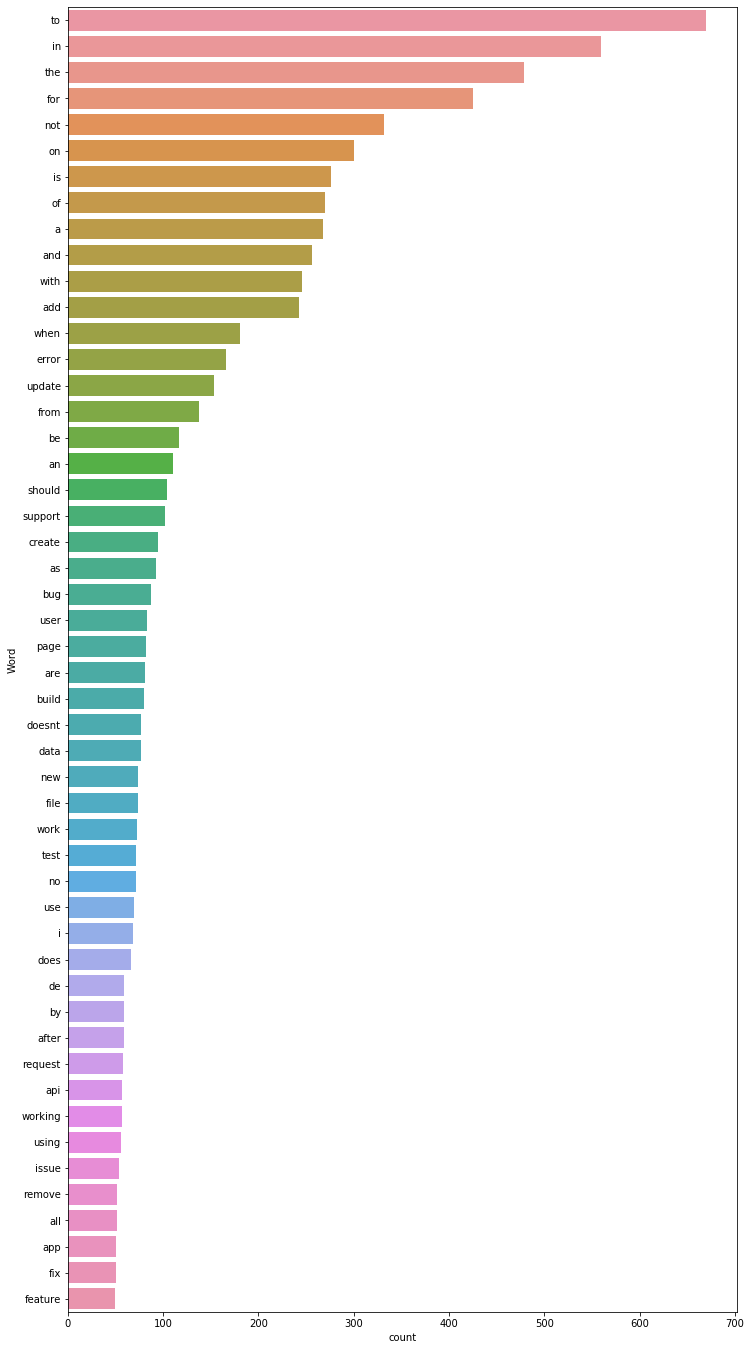

In [190]:
freq_words(prc_dset['title'], 50)

In [0]:
# Along with common english stopwords few others are present as noise in the data
newStopWords = ['www','com','r','n','c','e','f','b','g','h','l','http','https','u','v','x','z','de','non','rb','ef','li','ts','p','md','ci','go','cli','en','ms','br','sdm','us','k','cc','eslint','tat','im','fbadb','cccfb','dali']
# Extended list of pre-defined nltk stopwords with some redundant words
stopwords.extend(newStopWords)

In [192]:
#function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stopwords]
    return ' '.join(no_stopword_text)

#removing stopwords from title and body
prc_dset['title'] = prc_dset['title'].apply(lambda x: remove_stopwords(x))
prc_dset['body'] = prc_dset['body'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


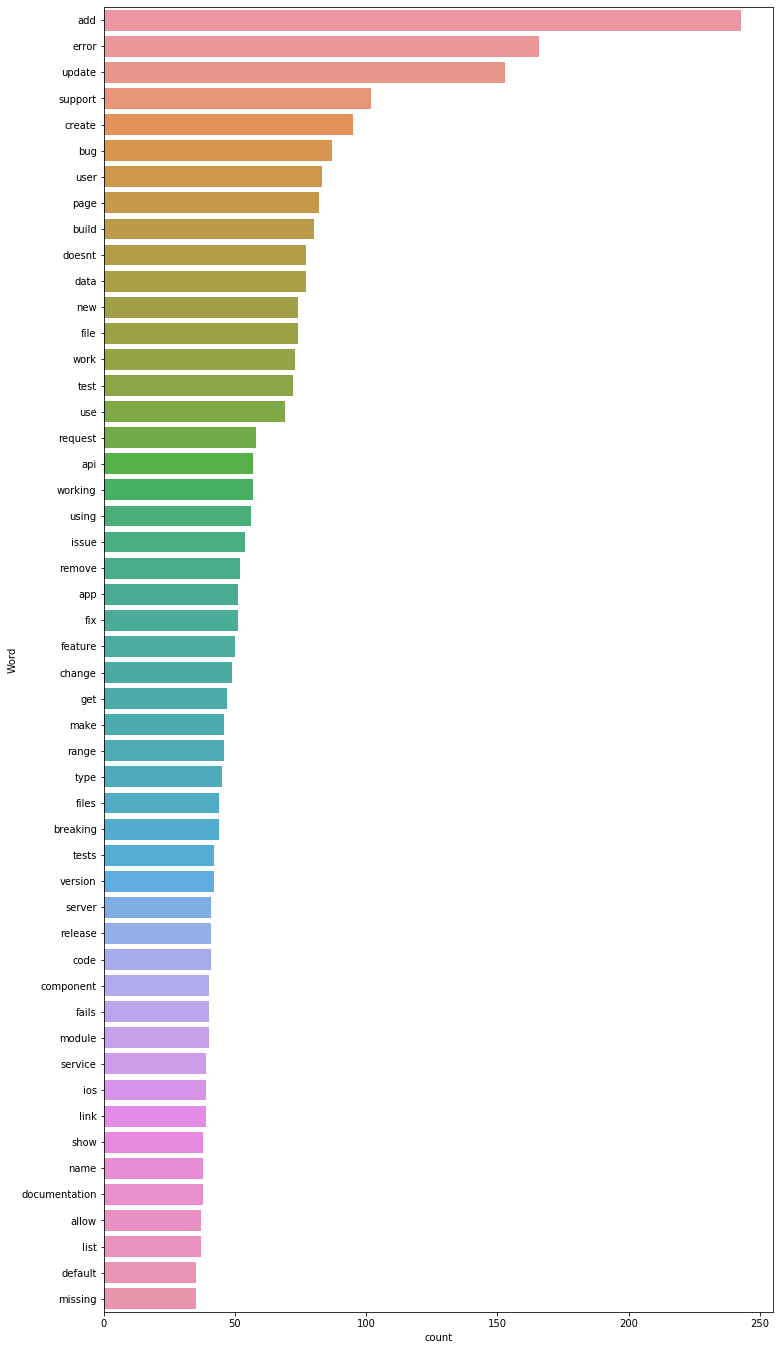

In [193]:
#Frequency of common words now showing some relevant words
freq_words(prc_dset['title'], 50)

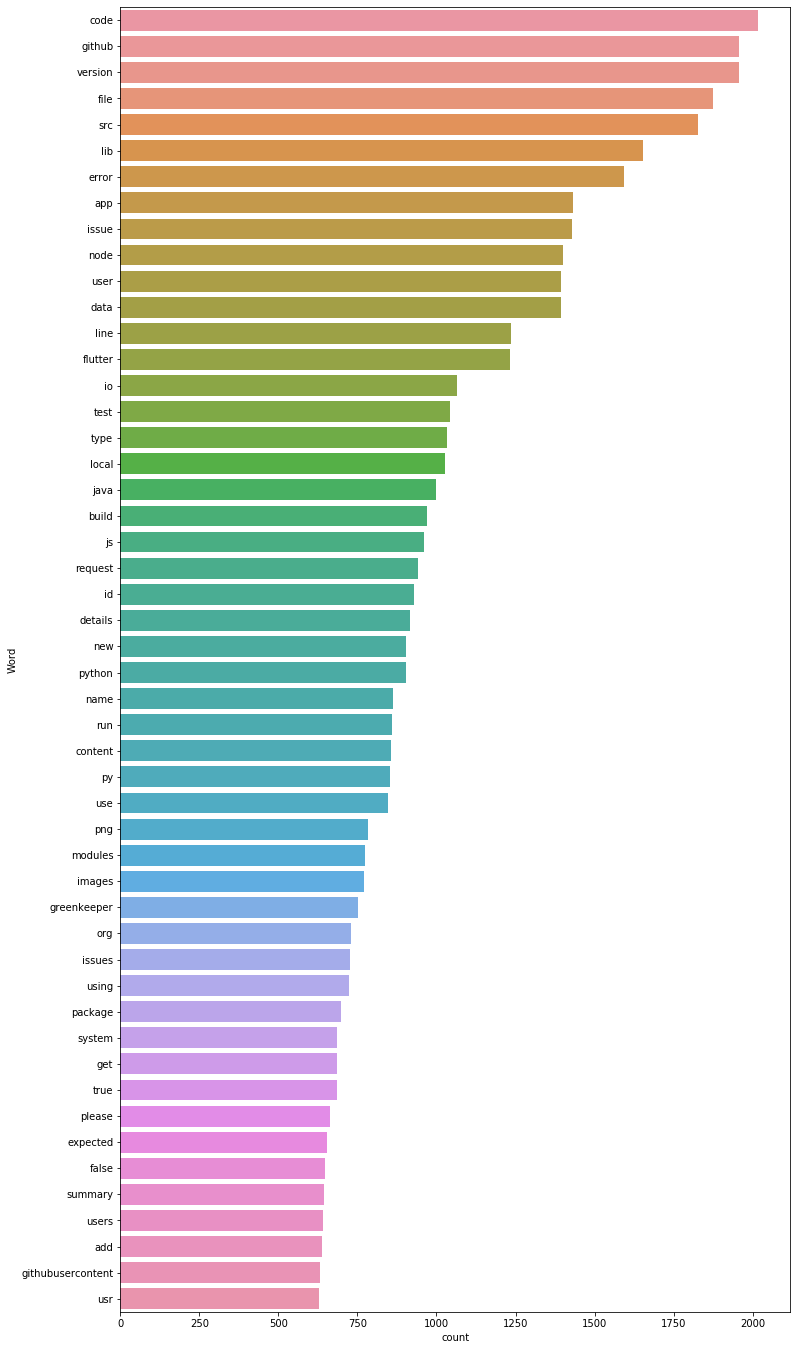

In [194]:
freq_words(prc_dset['body'], 50)

In [195]:
#cleaned dataset
prc_dset.head(10)

,title,body,labels
0,error building package zlib windows static fai...,package zlib windows staticvcpkg version debug,[needs-repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size don...,"[[1b] User Story, [3] Bug, [4c] High Priority,..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature-refactoring, good first issue, needs ..."
7,configurable window completion,fixed window completion given questionnaire co...,[feature]
8,telemetry add search counts baseline ping,follow github mozilla mobile fenix issues issu...,"[Feature:Search, Feature:Telemetry, P1, a-c]"
9,sql show zone configuration table table name p...,describe problem partitioned table created rep...,"[A-partitioning, A-sql-syntax, C-enhancement]"
12,add ice snow melt flag general flag category,could useful cases,"[enhancement, priority:low]"
13,vulnerability ddos get api projects,project apitestuattemplate apiv projectsgetque...,[ApiTestUat]


In [0]:
#Merging all labels in a single list
labels=[]
for i in prc_dset['labels']:
    labels.extend(i)

In [197]:
#Merged list of all labels
labels[:10]

['needs-repro',
 'enhancement',
 'area/environments',
 '[1b] User Story',
 '[3] Bug',
 '[4c] High Priority',
 '[5a] Tiny',
 '[6] RC Blockage',
 '[7] Estimated',
 'feature-refactoring']

In [0]:
#Counting frequency of the labels
count={}
for x in labels:
    if x not in count:
        count[x]=1
    else:
        count[x]+=1
d = collections.Counter(count)
freq=[]
i=0
for w,c in d.most_common(2502):
    freq.append([w,c])

In [199]:
#1st 50 frequent labels
freq[:50]

[['bug', 673],
 ['enhancement', 586],
 ['question', 147],
 ['help wanted', 104],
 ['good first issue', 87],
 ['wontfix', 72],
 ['feature', 67],
 ['Bug', 55],
 ['stale', 48],
 ['greenkeeper', 47],
 ['in progress', 39],
 ['triaged', 38],
 ['type: bug', 33],
 ['documentation', 31],
 ['duplicate', 30],
 ['kind/bug', 28],
 ['task', 26],
 ['invalid', 26],
 ['user-submission', 25],
 ['assigned-to-author', 23],
 ['review', 21],
 ['docs', 20],
 ['Enhancement', 20],
 ['N: AdGuard Browser Extension', 18],
 ['feature request', 18],
 ['P3: Medium', 17],
 ['browser-firefox', 17],
 ['P1', 15],
 ['Priority: High', 15],
 ['Priority: Medium', 15],
 ['frontend', 15],
 ['support', 14],
 ['design', 14],
 ['Epic', 14],
 ['new-version', 14],
 ['cxp', 14],
 ['browser-firefox-mobile', 14],
 ['ui', 13],
 ['Feature', 13],
 ['high priority', 13],
 ['triage', 13],
 ['discussion', 12],
 ['priority/P0', 12],
 ['doc-enhancement', 12],
 ['Type: Bug', 12],
 ['type: enhancement', 12],
 ['In Scope (June 2019)', 11],
 ['t

In [0]:
#Labels of different repositories are in different forms
#as they are created manually
#need to bring it in same shape to get proper count

#Removing digits and punctuations from labels
def clean_label(l):
    s=','.join(l)
    s=re.sub("[\[\\]]",'',s)
    s=re.sub("['0123456789']",'',s)
    s=''.join([char.lower() for char in s])
    st=[]
    for com in s.split(','):
        l=[]
        for wo in com.split():
            if not wo in ['r','c','b','rc','a','l','x','z',':','p:']:
                l.append(wo)
        st.append(' '.join(l))
    return ','.join(st) 

In [201]:
#Adding the cleaned labels to the dataset
prc_dset['clean_lbl']=prc_dset['labels'].apply(lambda x: clean_label(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
#Dataset with the cleaned labels
prc_dset.head(10)

,title,body,labels,clean_lbl
0,error building package zlib windows static fai...,package zlib windows staticvcpkg version debug,[needs-repro],needs-repro
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement],enhancement
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments],area/environments
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size don...,"[[1b] User Story, [3] Bug, [4c] High Priority,...","user story,bug,high priority,tiny,blockage,est..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature-refactoring, good first issue, needs ...","feature-refactoring,good first issue,needs pr,..."
7,configurable window completion,fixed window completion given questionnaire co...,[feature],feature
8,telemetry add search counts baseline ping,follow github mozilla mobile fenix issues issu...,"[Feature:Search, Feature:Telemetry, P1, a-c]","feature:search,feature:telemetry,p,a-c"
9,sql show zone configuration table table name p...,describe problem partitioned table created rep...,"[A-partitioning, A-sql-syntax, C-enhancement]","a-partitioning,a-sql-syntax,c-enhancement"
12,add ice snow melt flag general flag category,could useful cases,"[enhancement, priority:low]","enhancement,priority:low"
13,vulnerability ddos get api projects,project apitestuattemplate apiv projectsgetque...,[ApiTestUat],apitestuat


In [0]:
#List of lists form of labels converted to string
#Need to get it back in original form
lbls=[]
for i in prc_dset['clean_lbl']:
  l=i.split(',')
  lbls.append(l)

In [204]:
#Original form achieved
lbls[:10]

[['needs-repro'],
 ['enhancement'],
 ['area/environments'],
 ['user story', 'bug', 'high priority', 'tiny', 'blockage', 'estimated'],
 ['feature-refactoring', 'good first issue', 'needs pr', 'type-code health'],
 ['feature'],
 ['feature:search', 'feature:telemetry', 'p', 'a-c'],
 ['a-partitioning', 'a-sql-syntax', 'c-enhancement'],
 ['enhancement', 'priority:low'],
 ['apitestuat']]

In [0]:
#"bug","Bug" & "kind/bug" are same hence need to make them as same word,say, "bug"
#Same thing applies for other labels
#Using multiple string replaces for the same purpose
lbls_clean=[]
for i in lbls:
  i=[w.replace('type: bug','bug').replace('kind/bug','bug').replace('type_bug','bug').replace('type:bug','bug').replace('type bug','bug').replace('type.bug','bug').replace('type-bug','bug').replace('bug / fix','bug').replace('🐞 bug','bug').replace('type: bug 🐛','bug').replace('🐛 bug','bug').replace('bug 🐛','bug').replace('c-enhancement','enhancement').replace('doenhancement','enhancement').replace('type: enhancement','enhancement').replace('type:enhancement','enhancement').replace('kind/enhancement','enhancement').replace('improvement','enhancement').replace('✨ enhancement','enhancement').replace('feature request','feature').replace('feature_request','feature').replace('new feature','feature').replace('type: feature','feature').replace('kind/feature','feature').replace('feature-refactoring','feature').replace('docs','documentation').replace('priority: high','highpriority').replace('priority:high','highpriority').replace('priority - high','highpriority').replace('priority/high','highpriority').replace('priority.high','highpriority').replace('priority-critical','highpriority').replace('priority: critical','highpriority').replace('high priority','highpriority').replace('priority.medium','mediumpriority').replace('medium priority','mediumpriority').replace('type: question','question').replace('kind/question','question').replace('🤔 question','question').replace('type:support','support').replace('in-progress','in progress').replace('help wanted','helpwanted').replace('type.task','task') for w in i]
  lbls_clean.append(i)


In [206]:
#cleaned labels
lbls_clean[:25]

[['needs-repro'],
 ['enhancement'],
 ['area/environments'],
 ['user story', 'bug', 'highpriority', 'tiny', 'blockage', 'estimated'],
 ['feature', 'good first issue', 'needs pr', 'type-code health'],
 ['feature'],
 ['feature:search', 'feature:telemetry', 'p', 'a-c'],
 ['a-partitioning', 'a-sql-syntax', 'enhancement'],
 ['enhancement', 'priority:low'],
 ['apitestuat'],
 ['enhancement'],
 ['bug', 'compiler', 'highpriority', 'repl'],
 ['not-reproducible'],
 ['support'],
 ['backport', 'enhancement'],
 ['category: ux', 'low'],
 ['backtest', 'good first issue'],
 ['severe: feature', 'tool', '○ platform-fuchsia'],
 ['cgmes', 'bug'],
 ['enhancement'],
 ['highpriority', 'type: refactor'],
 ['bug'],
 ['back end', 'feature', 'highpriority'],
 ['question'],
 ['wontfix']]

In [0]:
#Now the labels are ready for frequency count
#Merging all labels in a single list
labels=[]
for i in lbls_clean:
    labels.extend(i)

In [208]:
#Total no. of labels
len(labels)

7266

In [209]:
labels[:10]

['needs-repro',
 'enhancement',
 'area/environments',
 'user story',
 'bug',
 'highpriority',
 'tiny',
 'blockage',
 'estimated',
 'feature']

In [0]:
#Frequency Count of common labels
count={}
for x in labels:
    if x not in count:
        count[x]=1
    else:
        count[x]+=1
d = collections.Counter(count)
freq=[]
i=0
for w,c in d.most_common():
    freq.append([w,c])

In [211]:
#Most frequent labels
freq[:30]

[['bug', 861],
 ['enhancement', 663],
 ['question', 174],
 ['feature', 140],
 ['helpwanted', 106],
 ['good first issue', 89],
 ['highpriority', 85],
 ['wontfix', 75],
 ['documentation', 63],
 ['in progress', 51],
 ['stale', 50],
 ['p', 48],
 ['greenkeeper', 47],
 ['triaged', 42],
 ['task', 39],
 ['medium', 36],
 ['duplicate', 35],
 ['invalid', 30],
 ['support', 26],
 ['user-submission', 25],
 ['ui', 23],
 ['assigned-to-author', 23],
 ['priority: medium', 22],
 ['review', 21],
 ['', 21],
 ['design', 19],
 ['high', 19],
 ['n: adguard browser extension', 18],
 ['frontend', 18],
 ['epic', 18]]

In [212]:
#Counts have changed properly
#Now adding cleaned labels to the dataset
prc_dset['lbls_clean']=lbls_clean
prc_dset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,body,labels,clean_lbl,lbls_clean
0,error building package zlib windows static fai...,package zlib windows staticvcpkg version debug,[needs-repro],needs-repro,[needs-repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement],enhancement,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments],area/environments,[area/environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size don...,"[[1b] User Story, [3] Bug, [4c] High Priority,...","user story,bug,high priority,tiny,blockage,est...","[user story, bug, highpriority, tiny, blockage..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature-refactoring, good first issue, needs ...","feature-refactoring,good first issue,needs pr,...","[feature, good first issue, needs pr, type-cod..."


In [0]:
#Not all labels can be taken for model building hence selecting
#Important and some common labels of almost every repository
selected_labels=['bug','enhancement','question','feature','helpwanted','highpriority','documentation','greenkeeper','task','invalid','support','review','frontend']

In [214]:
#taking dataset to another dataframe
data=prc_dset[["title","body","lbls_clean"]]
data.head()

,title,body,lbls_clean
0,error building package zlib windows static fai...,package zlib windows staticvcpkg version debug,[needs-repro]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[area/environments]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size don...,"[user story, bug, highpriority, tiny, blockage..."
6,upgrade isort,using isort pypi org project isort latest migh...,"[feature, good first issue, needs pr, type-cod..."


In [215]:
#To keep only selected labels and remove others
#each row is intersected with the selected_labels lists
def intersection(lst1, lst2): 
   
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3

data['lbls_clean']=[intersection(selected_labels,i) for i in data['lbls_clean']]
data.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,title,body,lbls_clean
0,error building package zlib windows static fai...,package zlib windows staticvcpkg version debug,[]
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
4,helm podantiaffinity templating error,describe bug helm charts fail generate proper ...,[]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size don...,"[bug, highpriority]"
6,upgrade isort,using isort pypi org project isort latest migh...,[feature]
7,configurable window completion,fixed window completion given questionnaire co...,[feature]
8,telemetry add search counts baseline ping,follow github mozilla mobile fenix issues issu...,[]
9,sql show zone configuration table table name p...,describe problem partitioned table created rep...,[enhancement]
12,add ice snow melt flag general flag category,could useful cases,[enhancement]
13,vulnerability ddos get api projects,project apitestuattemplate apiv projectsgetque...,[]


In [0]:
#Selected labels resulted in some empty labels as many repositories do not
#have them
def clean(s):
  '''
  Sets Empty labels as NaNs
  '''
  
  if len(s) == 0:
    s=np.nan
  return s

#Removing empty label rows
ldata=data.copy(deep=True)   
ldata['lbls_clean']=ldata['lbls_clean'].apply(lambda x: clean(x))
ldata.dropna(inplace=True)

In [217]:
ldata.head()

,title,body,lbls_clean
1,pagination bug removing item,reported pro user exemple table items per page...,[enhancement]
5,tradingview quick chart resize honor limit values,describe bug arrows tradingview chart size don...,"[bug, highpriority]"
6,upgrade isort,using isort pypi org project isort latest migh...,[feature]
7,configurable window completion,fixed window completion given questionnaire co...,[feature]
9,sql show zone configuration table table name p...,describe problem partitioned table created rep...,[enhancement]


In [218]:
#no. of rows after the operation
ldata.shape

(2131, 3)

In [0]:
#body and title have still empty values
#need to remove the rows having the same
ldata=ldata[ldata['body']!=""]
ldata=ldata[ldata['title']!=""]

In [220]:
#finally dataset is reduced to 1908 rows after cleaning and pre-processing
ldata.shape

(1908, 3)